# Day 1 - Part 2 - Processing

Text processing involves tokenization, stemming, lemmatization, and other techniques to transform text into a more digestible format for futher analysis.

We might want to normalize text by removing punctuation, converting to lowercase, and removing stop words. We might also want to stem or lemmatize words to reduce them to their root form.

## Importing Libraries

Before we get started, let's import the libraries we'll need.

In [9]:
# we will want the usual libraries for reading and processing data

from pathlib import Path

# counter for counting things
from collections import Counter

import pandas as pd
print(pd.__version__)

2.0.3


In [3]:
# first let's download csv file from the web url
url = "https://github.com/ValRCS/BSSDH_2023_workshop/raw/main/data/old_bailey_sample_1720_1913.csv"

# we will use pandas read_csv function to read the csv file
# and we will use the url directly
# index will simply be the row number
df = pd.read_csv(url, index_col=0)
print("Dataframe shape", df.shape)
# first let's see what we have
df.head()


Dataframe shape (1637, 3)


,trial_number,punishment,text
year,,,
1720,1,Transportation,",of St. Leonard Eastcheap , was ind..."
1720,2,Transportation,"Alice Jones , of St. Micha..."
1720,3,Transportation,"James Wilson , of St Katha..."
1720,4,Transportation,"James Mercy , alias Masse ..."
1720,5,Transportation,"Benjamin Cook , alias Richard Smith ..."


In [7]:
# before we proceed further let's do some simple analysis of text that we have
# let's get all the text in one big string
# we will use join function to join all the text in one big string
# we will use the pandas apply function to apply join function to all the rows

full_text = " ".join(list(df.text.apply(str)))
print("Full text length", len(full_text))
# print first 100 characters
print(full_text[:100])
# print last 100 characters
print(full_text[-100:])

Full text length 5643653
,of  St. Leonard Eastcheap           , was indicted for          feloniously stealing 70 Pound weigh
, of felony, and other convictions were proved.    Sentence:           Three years' penal servitude.


In [10]:
# let's perform some symbol analysis
counter = Counter(full_text)
print(counter.most_common(10))

[(' ', 1401904), ('e', 487334), ('t', 353316), ('o', 310247), ('a', 301971), ('n', 271984), ('h', 245842), ('i', 226090), ('s', 223559), ('r', 221192)]


In [11]:
# let's get a full counter of all the symbols and put them into a new dataframe
df_symbols = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df_symbols.columns = ['symbol', 'count']
df_symbols.head()

,symbol,count
0,",",68220
1,o,310247
2,f,77862
3,,1401904
4,S,14383


In [12]:
# order by count
df_symbols.sort_values(by='count', ascending=False, inplace=True)
df_symbols.head(25)

,symbol,count
3,,1401904
8,e,487334
5,t,353316
1,o,310247
10,a,301971
9,n,271984
16,h,245842
19,i,226090
14,s,223559
11,r,221192


<Axes: xlabel='symbol'>

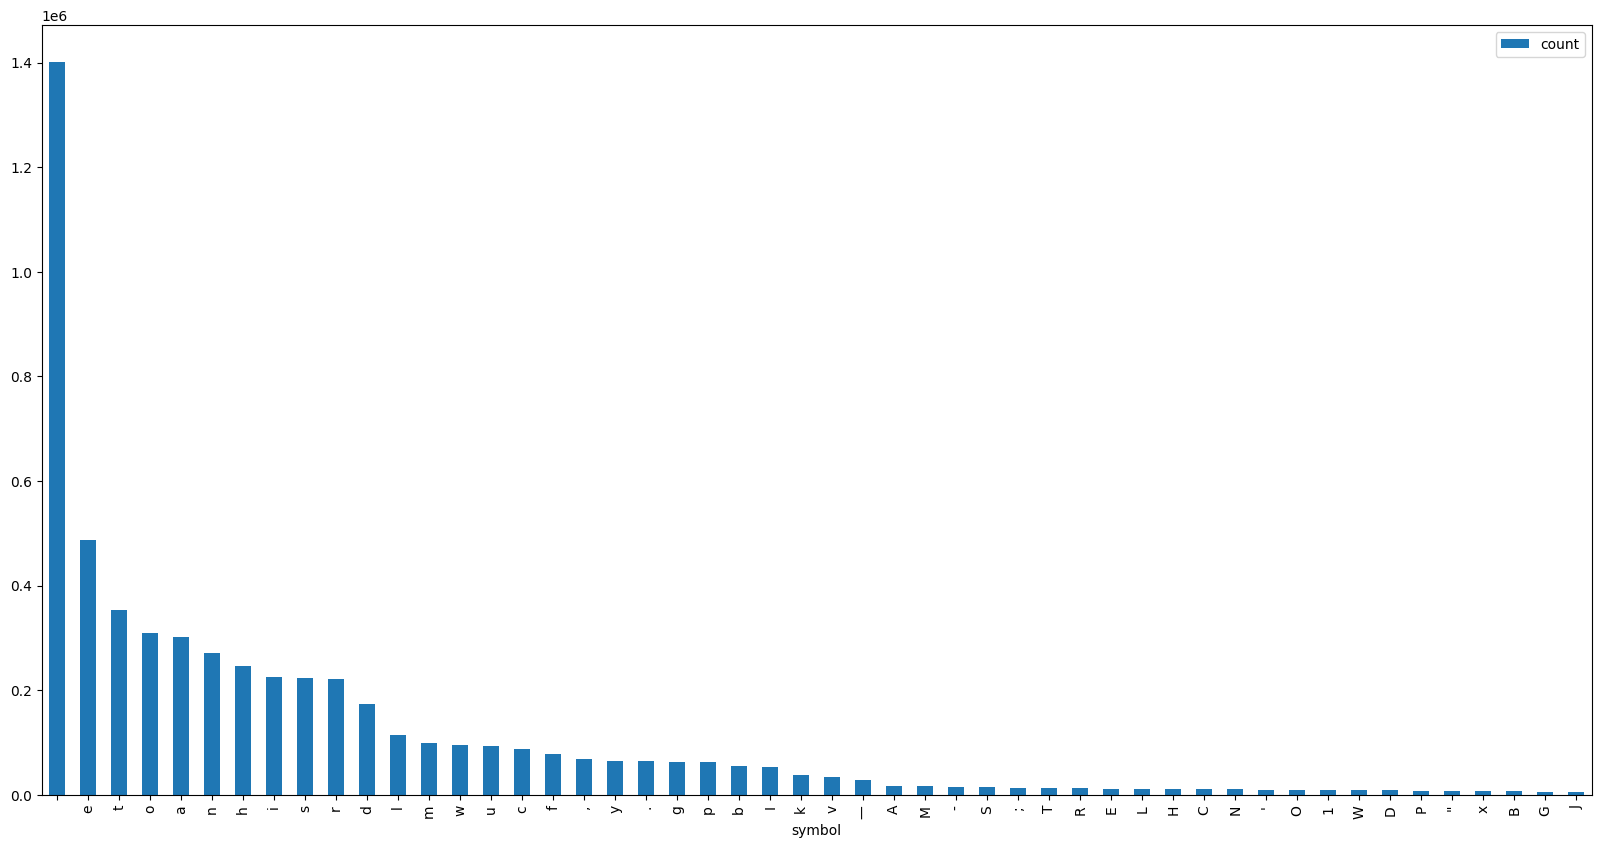

In [13]:
# let's plot top 50 symbols
df_symbols.head(50).plot.bar(x='symbol', y='count', figsize=(20, 10))


In [14]:
# let's see the tail of the dataframe
df_symbols.tail(25)

,symbol,count
75,],267
61,Z,248
76,+,195
69,!,159
79,/,158
77,*,156
78,X,121
63,&,96
80,|,18
84,†,16


<Axes: xlabel='symbol'>

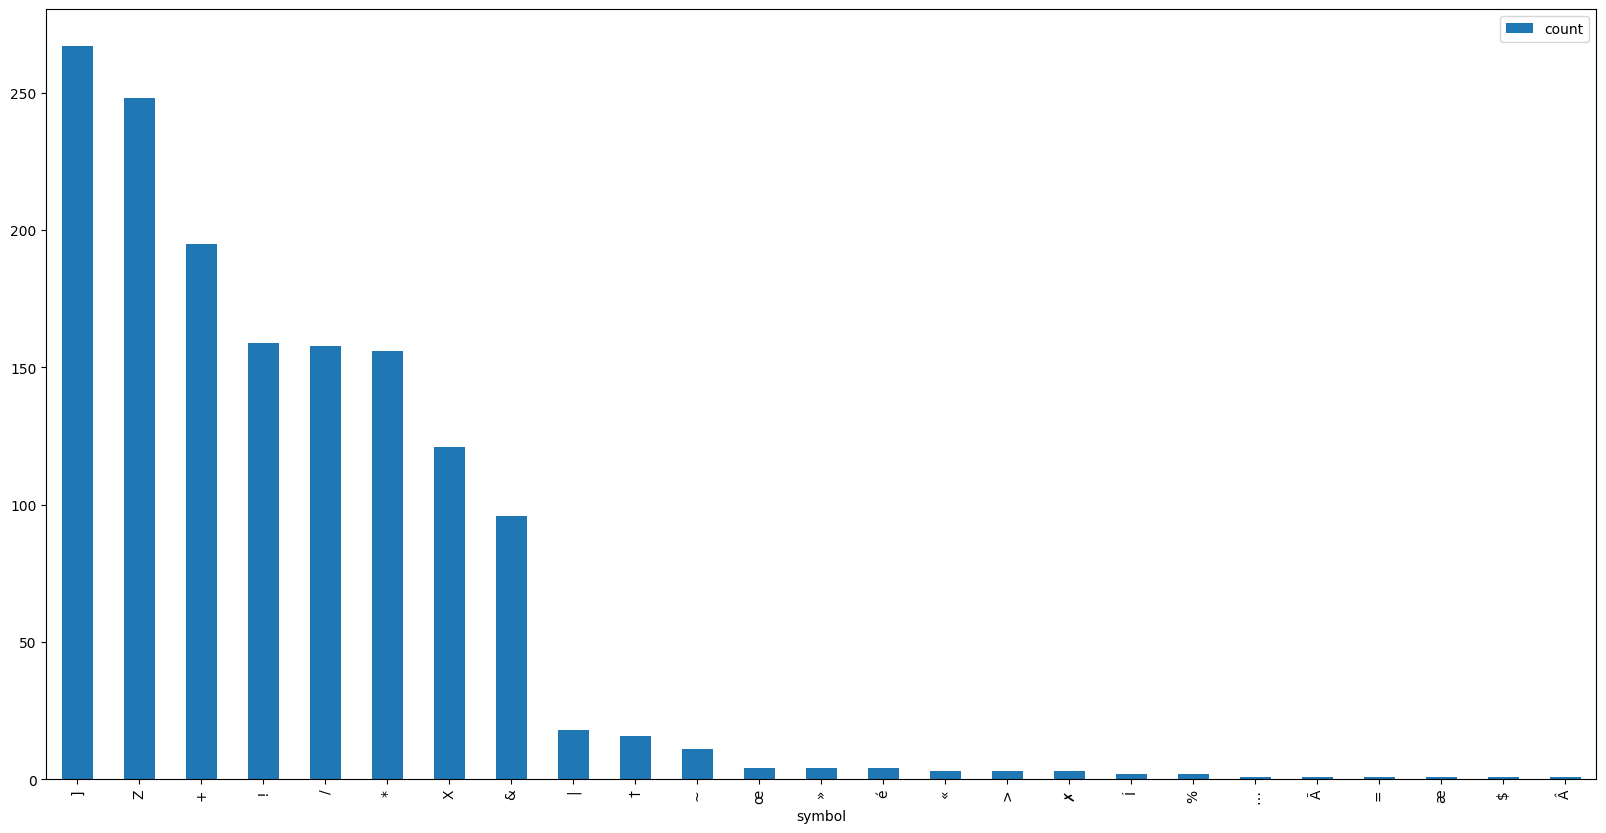

In [15]:
# let's plot this tail as well
df_symbols.tail(25).plot.bar(x='symbol', y='count', figsize=(20, 10))

In [16]:
# how many unique symbols do we have?
print("Unique symbols", len(df_symbols))
# round numbers are a bit suspicious


Unique symbols 100


In [17]:
# let's get unicode number for each symbol
df_symbols['unicode'] = df_symbols.symbol.apply(ord)
df_symbols.head()

,symbol,count,unicode
3,,1401904,32
8,e,487334,101
5,t,353316,116
1,o,310247,111
10,a,301971,97


In [18]:
over_127 = df_symbols[df_symbols.unicode > 127] # this is a slice of the dataframe not a copy
# if you need real copy then use copy() function
print("Symbols over 127", len(over_127))

Symbols over 127 13


In [20]:
# display all the symbols over 127
over_127

,symbol,count,unicode
83,—,28417,8212
86,£,662,163
84,†,16,8224
89,œ,4,339
90,»,4,187
99,é,4,233
91,«,3,171
97,✗,3,10007
93,Í,2,205
88,…,1,8230


<Axes: xlabel='symbol'>

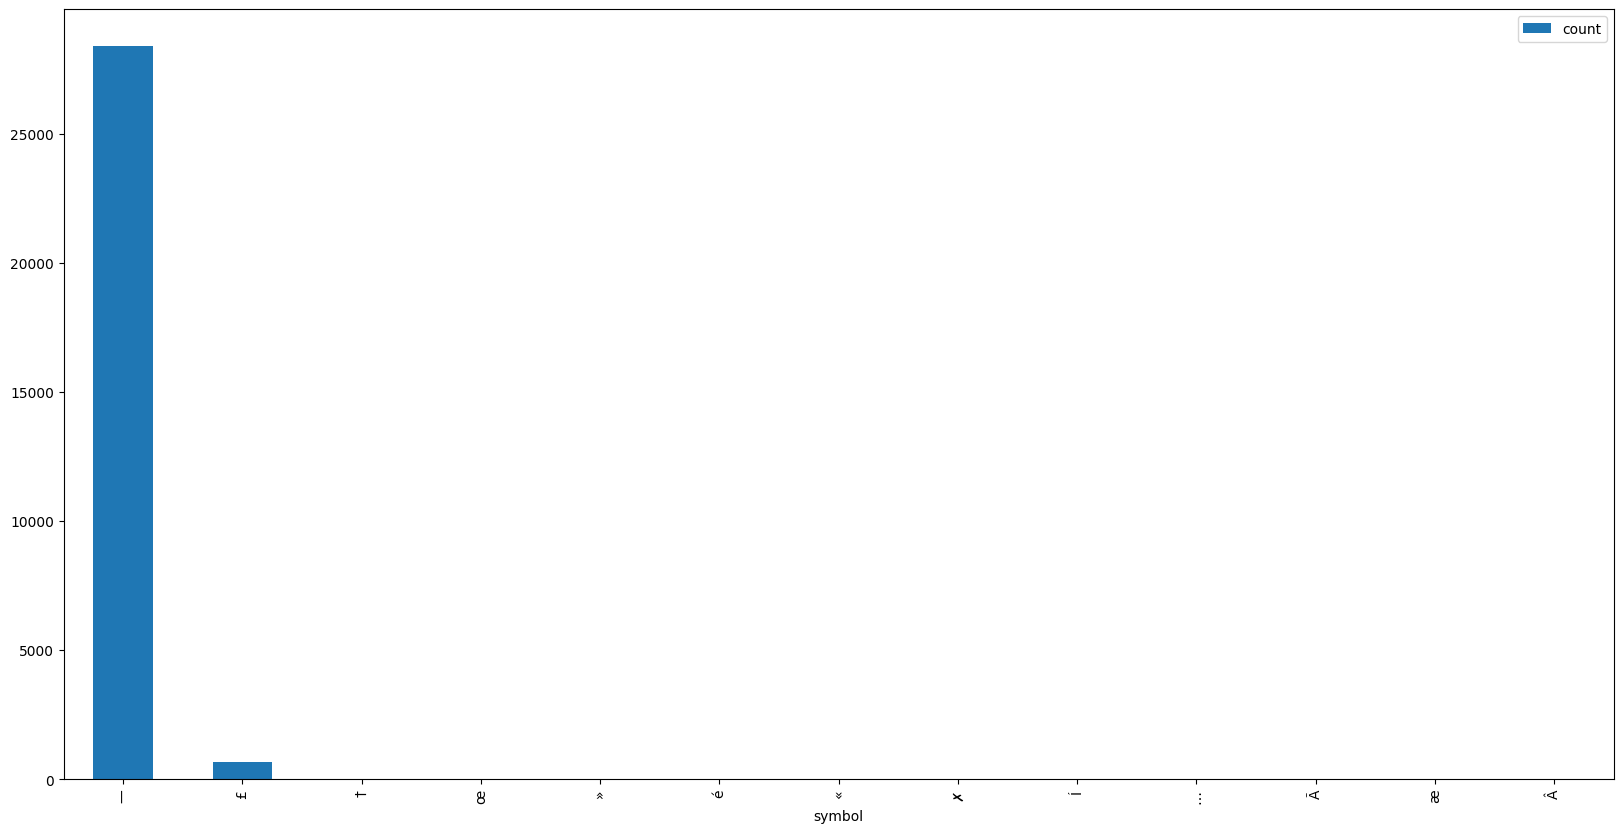

In [19]:
# let's plot the symbols over 127
over_127.plot.bar(x='symbol', y='count', figsize=(20, 10))

## Conclusion from symbol analysis

Looks like we do not have too many strange symbols outside the usual ASCII range. We can probably get away with just removing punctuation and converting to lowercase.

What do those strange symbols actually mean?

My wild guess as a non-specialist in old English is that they are part of the old English alphabet. I'm not sure if they are actually used in the text or if they are just artifacts of the OCR process.

In any case there are not that many of them so we can probably just remove them or leave them in as is.

Main thing we will want to do is remove extra whitespace as extra whitespace can cause problems with tokenization.